In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

%matplotlib inline


%load_ext autoreload
%autoreload 2

In [77]:
nl_kwta = stx.wta.KWTA(eta=0, tau=0, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag=.05 )
nl_ca1 = nl_kwta.run_trials()


In [78]:
print(nl_ca1.shape)

(100, 30, 1000)


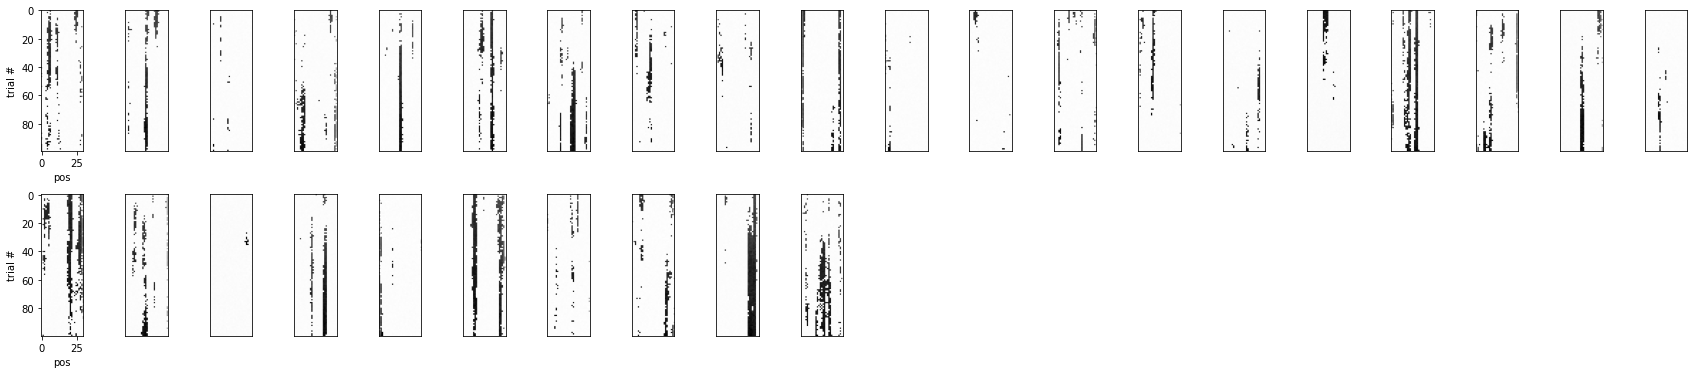

In [79]:
nl_singlecell_fig = stx.wta.plot_cells(nl_ca1, cell_inds = np.arange(0,30))

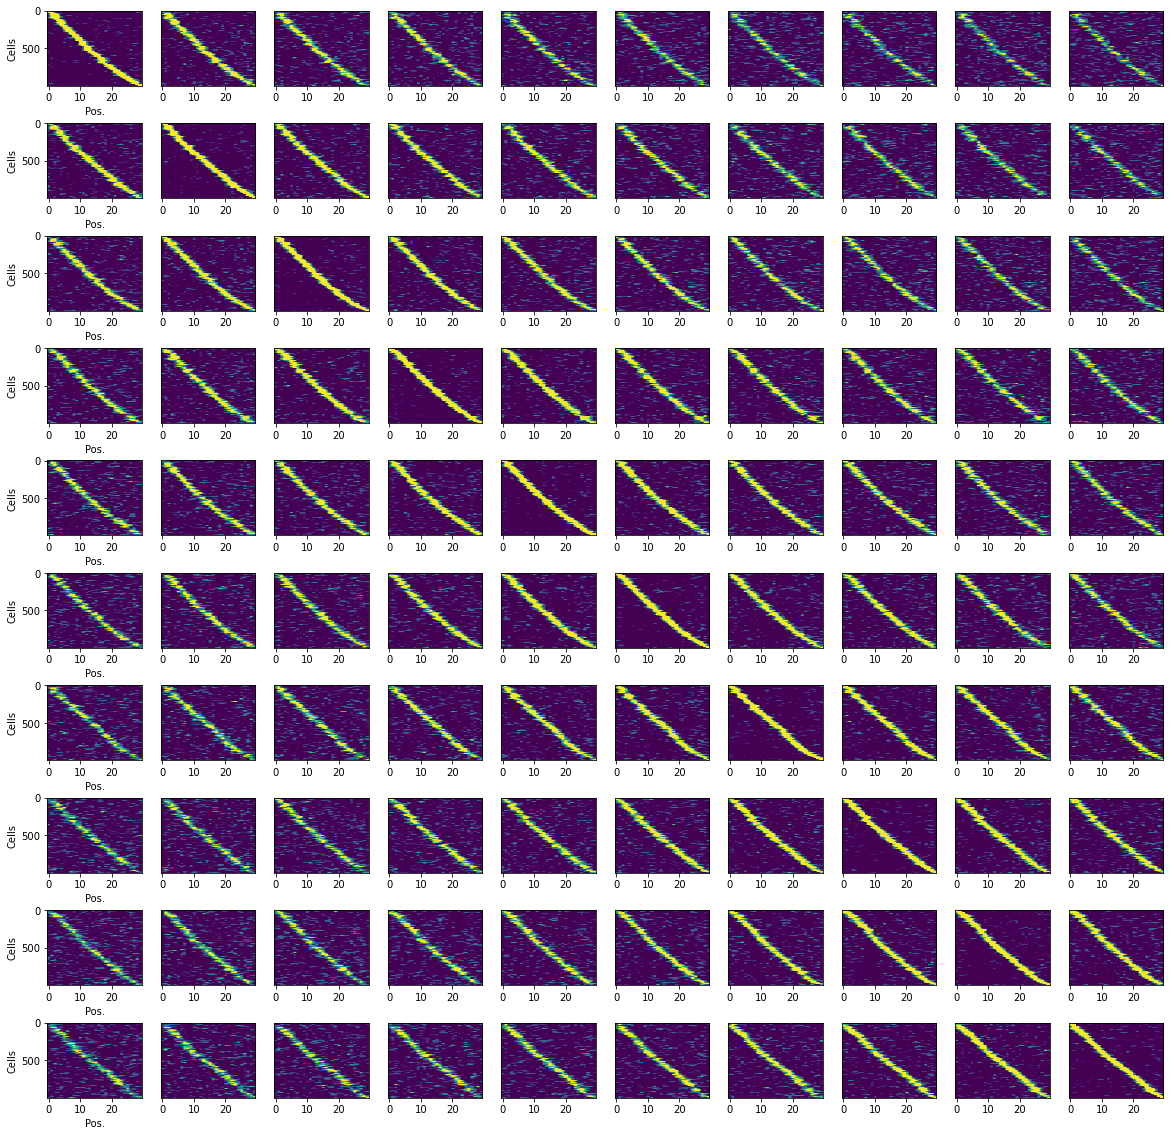

In [80]:
nl_pop_fig = stx.wta.plot_pop_activity(nl_ca1[::10,:,:])

In [81]:
l_kwta = stx.wta.KWTA(eta=1E-4, tau=1E-5, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag = .05)
l_ca1 = l_kwta.run_trials()

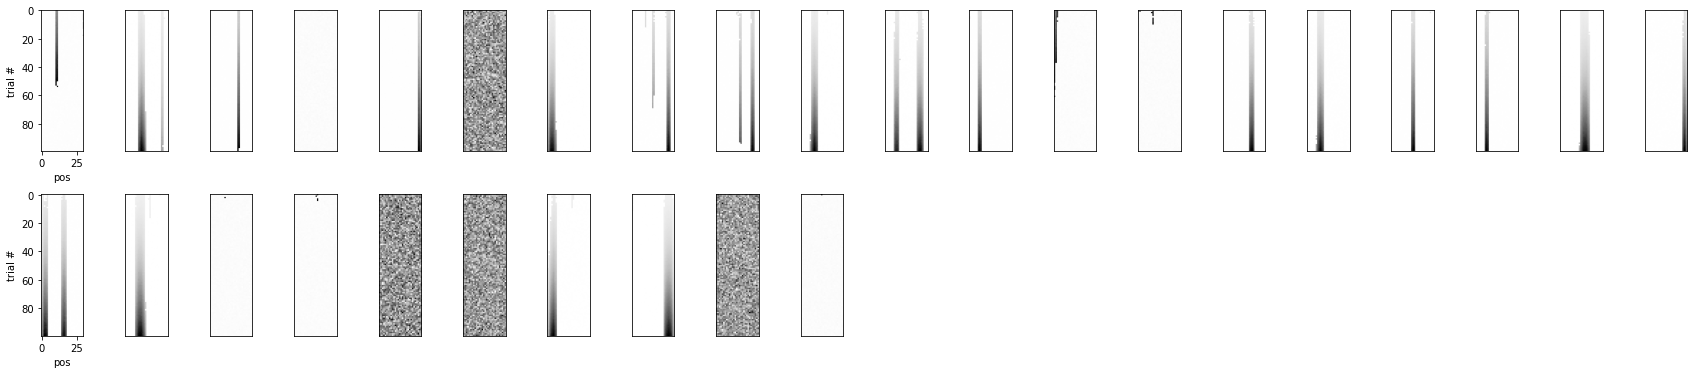

In [82]:
l_singlecell_fig = stx.wta.plot_cells(l_ca1, cell_inds = np.arange(0,30))

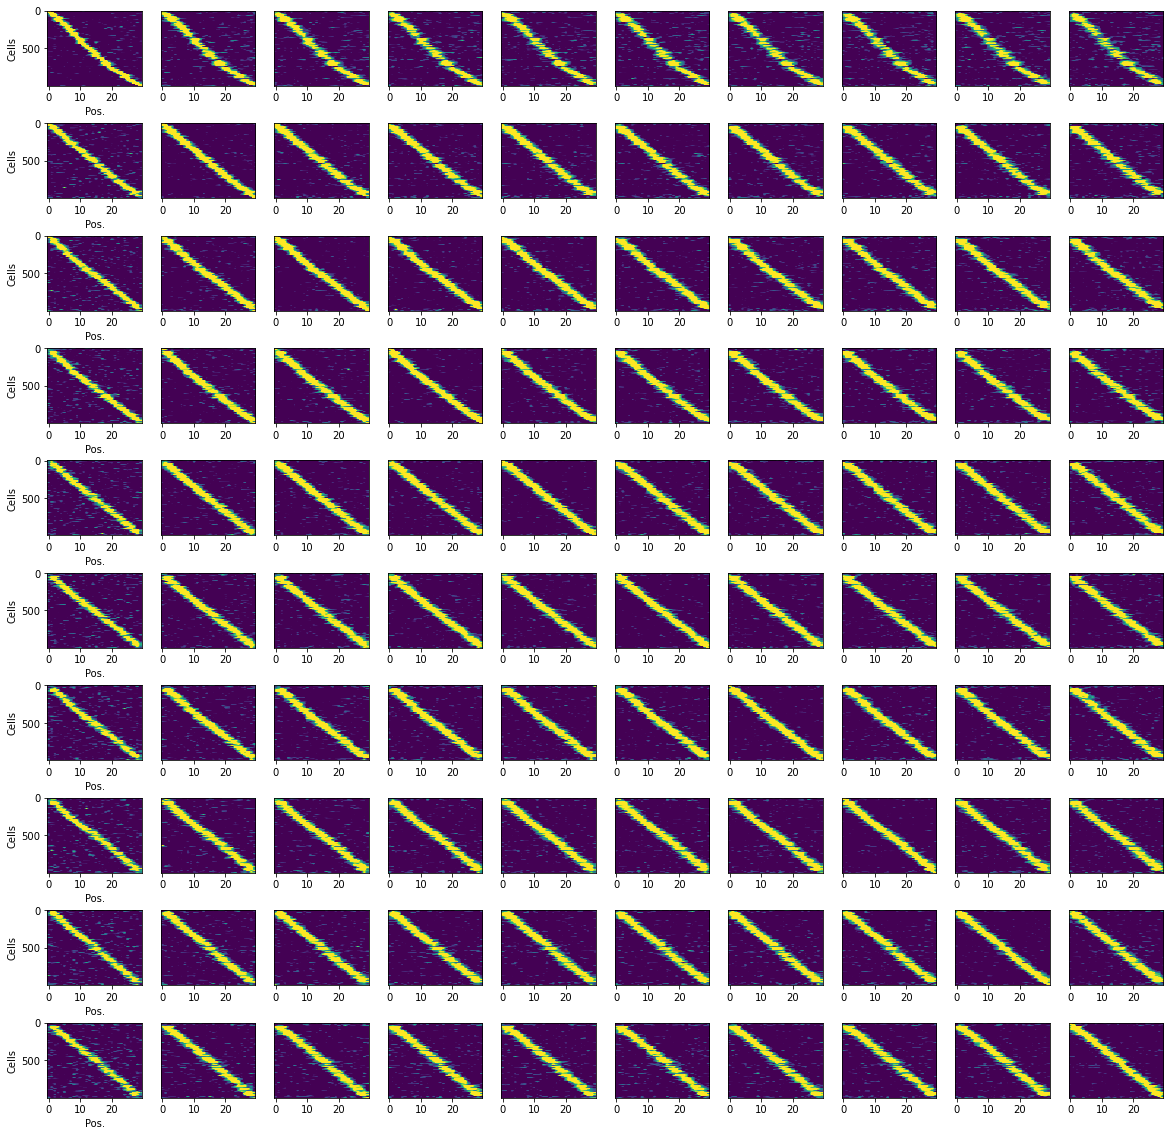

In [83]:
l_pop_fig = stx.wta.plot_pop_activity(l_ca1[::10,:,:])

In [84]:
occ = np.ones([30,])/30
nl_si = tpu.spatial_analyses.spatial_info(nl_ca1.mean(axis=0),occ)
l_si = tpu.spatial_analyses.spatial_info(l_ca1.mean(axis=0),occ)

(array([  6.,   4.,  22., 105., 241., 265., 208.,  94.,  39.,  16.]),
 array([0.06871599, 0.38667065, 0.7046253 , 1.02257995, 1.34053461,
        1.65848926, 1.97644391, 2.29439857, 2.61235322, 2.93030787,
        3.24826253]),
 <BarContainer object of 10 artists>)

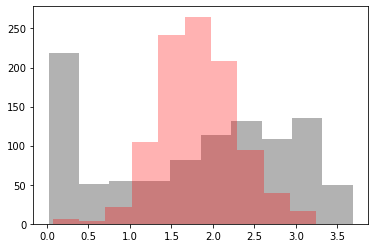

In [85]:
fig,ax = plt.subplots()
ax.hist(l_si, color='black', alpha=.3)
ax.hist(nl_si, color='red', alpha=.3)

In [86]:
l_mask = l_si>1
nl_mask = nl_si>1

l_trial_mat = l_ca1[:,:,l_mask]
l_trial_mat = l_trial_mat[-20:,:,:]
nl_trial_mat = nl_ca1[:,:,nl_mask]
nl_trial_mat = nl_trial_mat[-20:,:,:]

In [87]:
l_std = stx.spatial_analyses.spatial_std(l_trial_mat.mean(axis=0))
nl_std = stx.spatial_analyses.spatial_std(nl_trial_mat.mean(axis=0))

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01587302, 0.07215007, 0.13564214, 0.18903319, 0.27561328,
        0.35497835, 0.4040404 , 0.42135642, 0.46464646, 0.5007215 ,
        0.51370851, 0.53968254, 0.58441558, 0.5974026 , 0.61038961,
        0.62049062, 0.62770563, 0.66522367, 0.67821068, 0.68398268,
        0.6955267 , 0.6984127 , 0.70995671, 0.71717172, 0.72871573,
        0.95959596, 0.96248196, 0.96681097, 0.97113997, 0.97835498,
        0.98556999, 0.98845599, 0.98989899, 0.98989899, 0.98989899,
        0.99134199, 0.997114  , 0.998557  , 1.        ]),
 array([ 0.        ,  0.24489796,  0.48979592,  0.73469388,  0.97959184,
         1.2244898 ,  1.46938776,  1.71428571,  1.95918367,  2.20408163,
         2.44897959,  2.69387755,  2.93877551,  3.18367347,  3.42857143,
         3.67346939,  3.91836735,  4.16326531,  4.40816327,  4.65306122,
         4.89795918,  5.14285714,  5.3

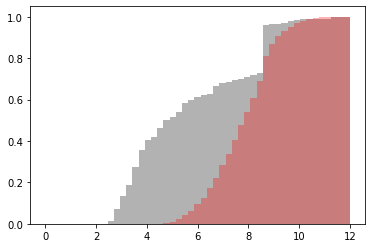

In [88]:
fig,ax = plt.subplots()
bins = np.linspace(0,12)
ax.hist(nl_std, bins = bins, color='red', alpha=.3,density=True, cumulative= True)
ax.hist(l_std,bins=bins, color='black', alpha=.3, zorder=-1,density=True, cumulative=True)

In [89]:
nl_fw = stx.spatial_analyses.field_width(nl_trial_mat.mean(axis=0))
l_fw = stx.spatial_analyses.field_width(l_trial_mat.mean(axis=0))

(array([0.        , 0.        , 0.08716323, 0.1251981 , 0.23930269,
        0.17115689, 0.14263074, 0.10459588, 0.05863708, 0.03961965,
        0.00950872, 0.00950872, 0.00475436, 0.00158479, 0.00633914,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

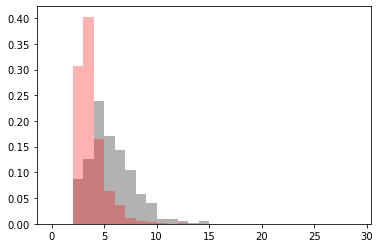

In [90]:
bins = np.arange(0,30)
fig,ax = plt.subplots()
ax.hist(nl_fw, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_fw,bins=bins, color='black', alpha=.3, zorder=-1,density=True)

In [91]:
l_peaks = stx.spatial_analyses.max_counts(l_trial_mat.mean(axis=0))
nl_peaks = stx.spatial_analyses.max_counts(nl_trial_mat.mean(axis=0))

(array([0.79889299, 0.17158672, 0.01476015, 0.        , 0.01476015]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

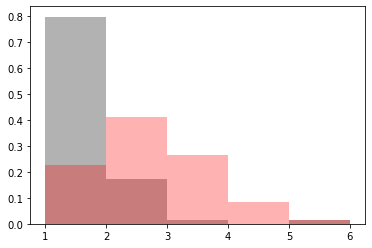

In [92]:
bins = np.arange(1,7)
fig,ax = plt.subplots()
ax.hist(nl_peaks, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_peaks,bins=bins, color='black', alpha=.3, zorder=-1,density=True)